## Tensorflow + Keras For Classification

(60000, 28, 28)

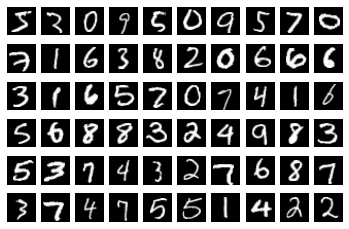

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

#normalize
X_train, X_test = X_train / 255.0, X_test / 255.0
m_train = X_train.shape[0]

fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow( X_train[500 * i], cmap='gray')
    axi.axis('off')

X_train.shape

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=0)

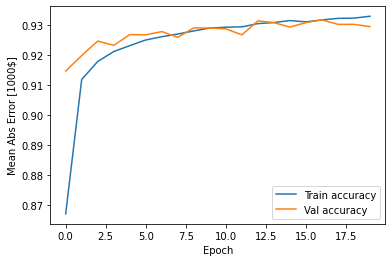

In [10]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [1000$]')
plt.plot(history.epoch, np.array(history.history['accuracy']), label='Train accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']), label = 'Val accuracy')
plt.legend()

### 2. MLP

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# model compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=0)

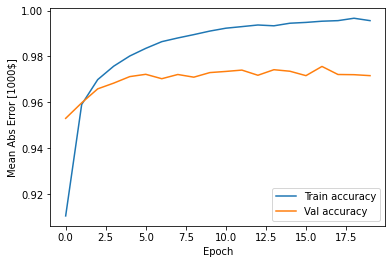

In [13]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [1000$]')
plt.plot(history.epoch, np.array(history.history['accuracy']), label='Train accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']), label = 'Val accuracy')
plt.legend()